In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb

# Load the data

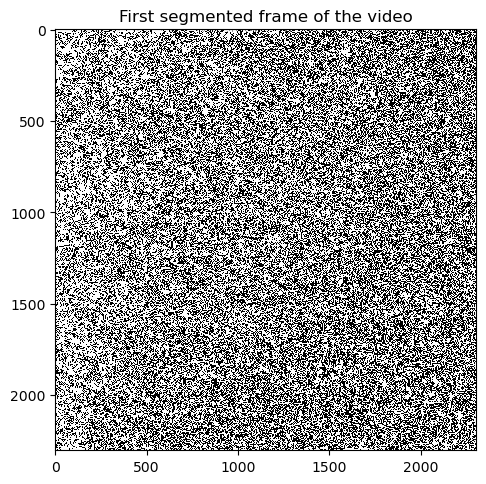

2304 2304


In [2]:
file_name="WT_dense_segmented.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|███████████████████████████████████████| 201/201 [00:36<00:00,  5.47it/s]


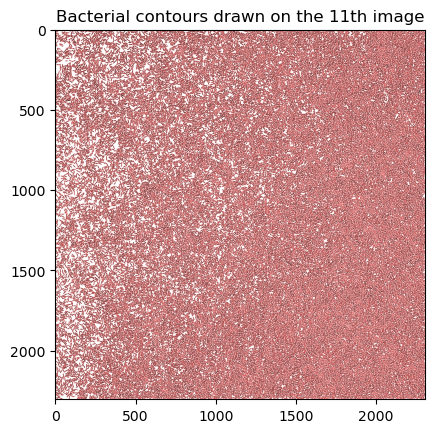

Fitting ellipses to the contours...: 100%|███████████████████████████████████████████| 201/201 [01:20<00:00,  2.50it/s]


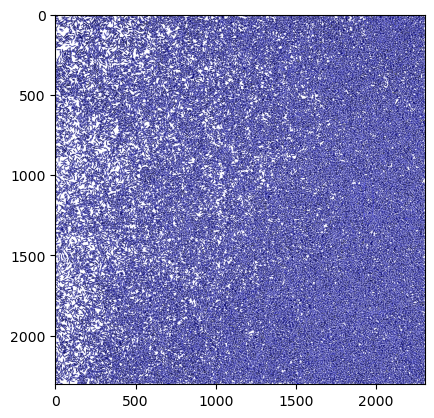

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=11, filter_max=(7,55))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,1115.566895,2304.526123,0,15.658649,6.449818,82.589149
1,2151.646973,2301.705811,0,5.899429,3.630190,61.845036
2,1935.558228,2302.747803,0,19.563745,5.187518,88.954262
3,1835.119629,2301.681396,0,21.847427,3.444440,86.584702
4,1285.207031,2303.827148,0,9.352269,3.776091,158.579590
...,...,...,...,...,...,...
8324103,136.654495,-0.182841,200,22.846252,5.662677,89.653580
8324104,31.551582,7.143306,200,23.277088,3.842240,44.404076
8324105,26.012835,1.511846,200,10.917605,3.980092,89.512642
8324106,17.000547,2.418560,200,6.286804,3.088333,143.523880


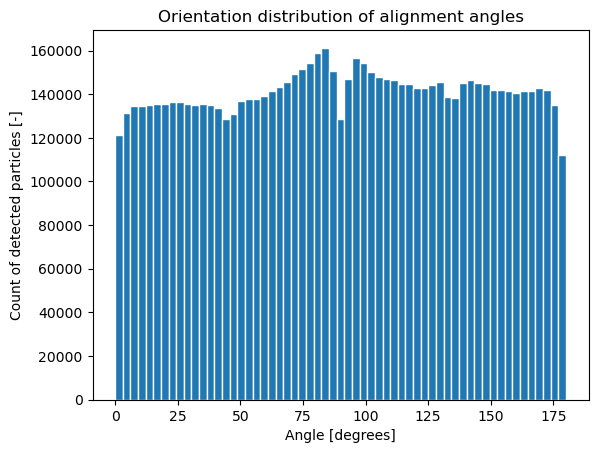

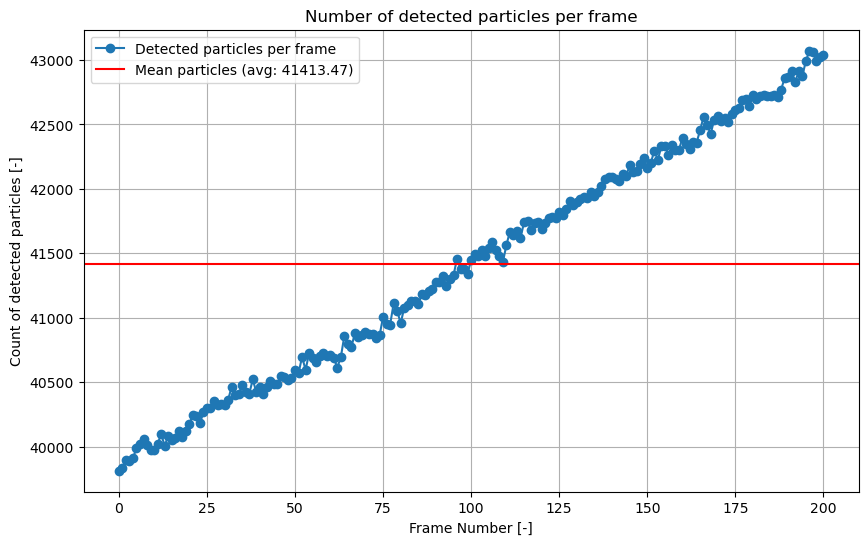

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')
plt.title("Orientation distribution of alignment angles")
plt.xlabel('Angle [degrees]')
plt.ylabel('Count of detected particles [-]')
plt.show()

# Count the number of particles per frame
particles_per_frame = ellipses_df.groupby('frame').size()

# Calculate the mean number of particles across all frames
mean_particles = particles_per_frame.mean()

# Plotting the number of detected particles per frame
plt.figure(figsize=(10,6))
plt.plot(particles_per_frame.index, particles_per_frame.values, marker='o', label='Detected particles per frame')  # Use plt.bar for a bar chart

# Plotting the mean number of particles as a horizontal line
plt.axhline(y=mean_particles, color='r', linestyle='-', label=f'Mean particles (avg: {mean_particles:.2f})')

# Adding titles and labels
plt.title('Number of detected particles per frame')
plt.xlabel('Frame Number [-]')
plt.ylabel('Count of detected particles [-]')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=30)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 200: 43042 trajectories present.


,particle,count
0,22540,201
1,8575,201
2,8579,201
3,8581,201
4,8585,201
...,...,...
74783,208053,31
74784,35364,31
74785,88468,31
74786,39659,31


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1195.775024,802.972351,0,12.253201,5.474721,141.204071,3
1,1195.373413,803.167542,1,12.607114,4.284654,133.402924,3
2,1195.594116,803.523865,2,12.642321,4.243151,133.443253,3
3,1196.307495,802.982605,3,12.474407,5.604755,135.134720,3
4,1196.177734,803.065186,4,12.911960,5.803479,137.827377,3
...,...,...,...,...,...,...,...
6724225,1837.458130,604.676575,196,10.312747,3.367471,158.778732,249528
6724226,1837.526001,604.743835,197,10.334655,3.448308,157.867752,249528
6724227,1829.596558,603.641235,198,12.151441,3.659796,87.072556,249528
6724228,1823.639893,603.819031,199,26.126873,4.379681,90.459526,249528


# Load the results of the tracking

In [7]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1195.775024,802.972351,0,12.253201,5.474721,141.204071,3
1,1195.373413,803.167542,1,12.607114,4.284654,133.402924,3
2,1195.594116,803.523865,2,12.642321,4.243151,133.443253,3
3,1196.307495,802.982605,3,12.474407,5.604755,135.134720,3
4,1196.177734,803.065186,4,12.911960,5.803479,137.827377,3
...,...,...,...,...,...,...,...
6724225,1837.458130,604.676575,196,10.312747,3.367471,158.778732,249528
6724226,1837.526001,604.743835,197,10.334655,3.448308,157.867752,249528
6724227,1829.596558,603.641235,198,12.151441,3.659796,87.072556,249528
6724228,1823.639893,603.819031,199,26.126873,4.379681,90.459526,249528


# Plot trajectories

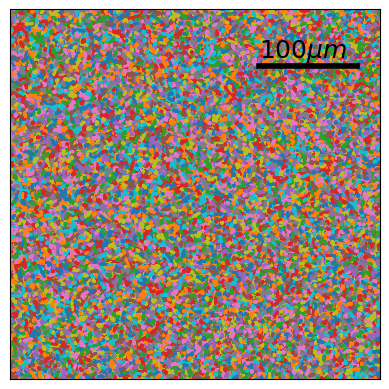

In [8]:
tb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1625)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=3)

particle_params.rename(columns={"x": "x [um]","y": "y [um]","major_axis_size": "major_axis_size [um]","minor_axis_size": "minor_axis_size [um]", "body_angle": "body_angle [degrees]", "vx":"vx [um/s]", "vy":"vy [um/s]", "vel":"vel [um/s]", "ax":"ax [um/s^2]", "ay":"ay [um/s^2]", "acc":"acc [um/s^2]", "diff_body_angle":"diff_body_angle [degrees]", "angular_vel": "angular_vel [degrees/s]", "angular_acc": "angular_acc [degrees/s^2]"}, inplace=True)

display(particle_params)


tb.write_kinematics(particle_params, file_name)

100%|███████████████████████████████████████████████████████████████████████████| 74788/74788 [06:36<00:00, 188.72it/s]


,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,194.313441,130.483007,0,1.991145,0.889642,141.204071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,194.248180,130.514725,1,2.048656,0.696256,133.402924,3,-0.021754,0.010573,0.024187,NaN,NaN,NaN,-7.801147,NaN,NaN
2,194.284044,130.572628,2,2.054377,0.689512,133.443253,3,0.011955,0.019301,0.022703,0.011236,0.002909,0.011607,0.040329,2.613825,NaN
3,194.399968,130.484673,3,2.027091,0.910773,135.134720,3,0.038641,-0.029318,0.048505,0.008896,-0.016206,0.018487,1.691467,0.550379,-0.687815
4,194.378882,130.498093,4,2.098193,0.943065,137.827377,3,-0.007029,0.004473,0.008331,-0.015223,0.011264,0.018937,2.692657,0.333730,-0.072216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6724225,298.586946,98.259943,196,1.675821,0.547214,158.778732,249528,-0.003696,0.047802,0.047945,-0.001660,0.017107,0.017187,-0.546280,-1.839198,-1.333364
6724226,298.597975,98.270873,197,1.679381,0.560350,157.867752,249528,0.003676,0.003643,0.005176,0.002458,-0.014720,0.014923,-0.910980,-0.121567,0.572544
6724227,297.309441,98.091701,198,1.974609,0.594717,87.072556,249528,-0.429512,-0.059724,0.433644,-0.144396,-0.021122,0.145933,-70.795197,-23.294739,-7.724391
6724228,296.341483,98.120592,199,4.245617,0.711698,90.459526,249528,-0.322653,0.009631,0.322796,0.035620,0.023118,0.042464,3.386971,24.727389,16.007376


# Data analysis

In [ ]:
#To quantify reversal

df = particle_params

# Calculate the sign of velocities
df['vx_sign'] = df['vx [um/s]'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df['vy_sign'] = df['vy [um/s]'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Function to count reversals in a group
def count_reversals(group):
    group['vx_sign_change'] = group['vx_sign'].diff() != 0
    group['vy_sign_change'] = group['vy_sign'].diff() != 0
    group['reversal'] = (group['vx_sign_change'] & group['vy_sign_change']).astype(int)
    return group['reversal'].sum()

# Apply the function to each group and get the count of reversals per particle
reversals_per_particle = df.groupby('particle').apply(count_reversals)

# Convert to DataFrame for better readability and add an index
reversals_df = reversals_per_particle.reset_index()
reversals_df.columns = ['Particle', 'Reversals']
reversals_df.index.name = 'Index'

# Calculate average and standard deviation
average_reversals = reversals_df['Reversals'].mean()
std_dev_reversals = reversals_df['Reversals'].std()

print("Indexation of Groups (Particles) and Their Reversals:")
print(reversals_df)
print(f"\nTotal number of unique particles: {len(reversals_df)}")
print(f"\nAverage number of reversals: {average_reversals}")
print(f"Standard deviation of reversals: {std_dev_reversals}")